In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


from pathlib import Path

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:


data = '../input/plantvillage-dataset/color'

paths = [path.parts[-2:] for path in
         Path(data).rglob('*.*')]                             #writing purpose ('*.*') so that all image formats can be retrieved
df = pd.DataFrame(data=paths, columns=['Class','Images'])     #create column names for dataframe
df = df.sort_values('Class',ascending=True)                   #sort class name
df.reset_index(drop=True, inplace=True)                       #sort index of each row
df 

,Class,Images
0,Apple___Apple_scab,f0d56524-1296-4a54-bafa-9b620baf9f1d___FREC_Sc...
1,Apple___Apple_scab,6643566f-d980-4bdb-88d7-4d3ab3c771fa___FREC_Sc...
2,Apple___Apple_scab,0b1e31fa-cbc0-41ed-9139-c794e6855e82___FREC_Sc...
3,Apple___Apple_scab,1a21aabb-6f74-4644-8d9e-a517568b7e9c___FREC_Sc...
4,Apple___Apple_scab,258ce9eb-2b67-475b-b09c-0bc83b0987f1___FREC_Sc...
...,...,...
54300,Tomato___healthy,c0c7cd05-de91-47b6-9702-823e34e7d332___RS_HL 0...
54301,Tomato___healthy,e6782c6b-bf00-492d-a30e-966fd641b823___RS_HL 9...
54302,Tomato___healthy,e9392a5e-2fac-48c5-a23d-df3aa3f61048___GH_HL L...
54303,Tomato___healthy,1732045f-a451-4325-aa86-717a8cbdaf02___RS_HL 9...


In [3]:
print('Count the number of image datasets')
print("Image Count : {}".format(len(df.Images)))
print("Class Count : {} \n".format(len(df['Class'].value_counts())))
print('Count the number of images in each class')
print(df['Class'].value_counts())

Count the number of image datasets
Image Count : 54305
Class Count : 38 

Count the number of images in each class
Class
Orange___Haunglongbing_(Citrus_greening)              5507
Tomato___Tomato_Yellow_Leaf_Curl_Virus                5357
Soybean___healthy                                     5090
Peach___Bacterial_spot                                2297
Tomato___Bacterial_spot                               2127
Tomato___Late_blight                                  1909
Squash___Powdery_mildew                               1835
Tomato___Septoria_leaf_spot                           1771
Tomato___Spider_mites Two-spotted_spider_mite         1676
Apple___healthy                                       1645
Tomato___healthy                                      1591
Blueberry___healthy                                   1502
Pepper,_bell___healthy                                1478
Tomato___Target_Spot                                  1404
Grape___Esca_(Black_Measles)                         

Text(0, 0.5, 'Count Image')

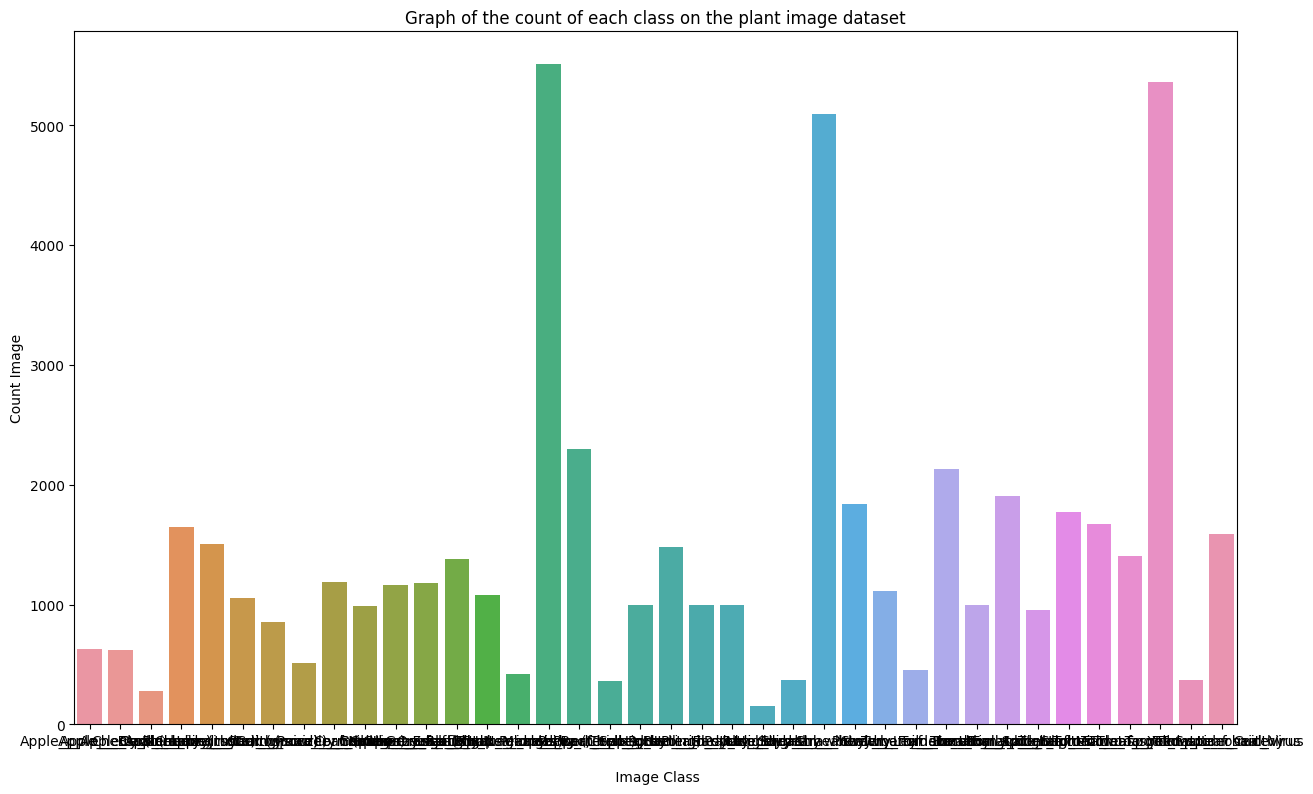

In [4]:
import seaborn as sns
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(15,9))
sns.countplot(data=df, x='Class')
plt.title('Graph of the count of each class on the plant image dataset')
plt.xlabel('\n Image Class')
plt.ylabel('Count Image')

In [5]:
import plotly.express as px

Class_Id_Dist_Total = df['Class'].value_counts(sort=False)

dist = df['Class'].value_counts()

fig = px.pie(
    values=dist.values,
    names=dist.index,
    hole=0.0
)

fig.update_traces(
    textinfo='percent',          # only percentages
    textposition='inside',       # keep text inside slices
    insidetextorientation='radial'
)

fig.update_layout(
    title='Data Distribution of Plant Images Dataset',
    title_x=0.5,
    showlegend=True,
    legend=dict(
        orientation='v',
        x=1.05,                  # push legend to the right
        y=0.5,
        font=dict(size=11)
    ),
    height=700,
    width=900
)

fig.show()



In [6]:
base_path = "../input/plantvillage-dataset/color"

class_path_dict = {
    cls: f"{base_path}/{cls}"
    for cls in df['Class'].unique()
}
class_path_dict


{'Apple___Apple_scab': '../input/plantvillage-dataset/color/Apple___Apple_scab',
 'Apple___Black_rot': '../input/plantvillage-dataset/color/Apple___Black_rot',
 'Apple___Cedar_apple_rust': '../input/plantvillage-dataset/color/Apple___Cedar_apple_rust',
 'Apple___healthy': '../input/plantvillage-dataset/color/Apple___healthy',
 'Blueberry___healthy': '../input/plantvillage-dataset/color/Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew': '../input/plantvillage-dataset/color/Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy': '../input/plantvillage-dataset/color/Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': '../input/plantvillage-dataset/color/Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_': '../input/plantvillage-dataset/color/Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight': '../input/plantvillage-dataset/color/Corn_(maize)___Northern_Leaf_Bli

In [7]:
def get_dims(file):
  im = Image.open(file)
  arr = np.array(im)
  h,w,d = arr.shape
  return h,w

[########################################] | 100% Completed | 2.16 s
[########################################] | 100% Completed | 2.07 s
[########################################] | 100% Completed | 1.53 s
[########################################] | 100% Completed | 4.02 s
[########################################] | 100% Completed | 3.71 s
[########################################] | 100% Completed | 2.78 s
[########################################] | 100% Completed | 2.58 s
[########################################] | 100% Completed | 1.84 s
[########################################] | 100% Completed | 2.88 s
[########################################] | 100% Completed | 2.69 s
[########################################] | 100% Completed | 2.88 s
[########################################] | 100% Completed | 3.00 s
[########################################] | 100% Completed | 3.41 s
[########################################] | 100% Completed | 2.77 s
[#################################

/usr/local/lib/python3.11/dist-packages/pandas/plotting/_matplotlib/core.py:580: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.



[########################################] | 100% Completed | 3.14 s
[########################################] | 100% Completed | 1.34 s
[########################################] | 100% Completed | 1.86 s
[########################################] | 100% Completed | 9.23 s
[########################################] | 100% Completed | 4.01 s
[########################################] | 100% Completed | 2.89 s
[########################################] | 100% Completed | 1.84 s
[########################################] | 100% Completed | 4.43 s
[########################################] | 100% Completed | 2.87 s
[########################################] | 100% Completed | 4.51 s
[########################################] | 100% Completed | 2.58 s
[########################################] | 100% Completed | 3.90 s
[########################################] | 100% Completed | 3.89 s
[########################################] | 100% Completed | 3.42 s
[#################################

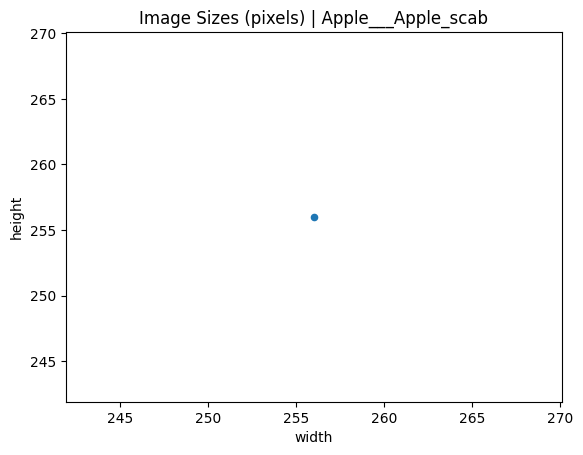

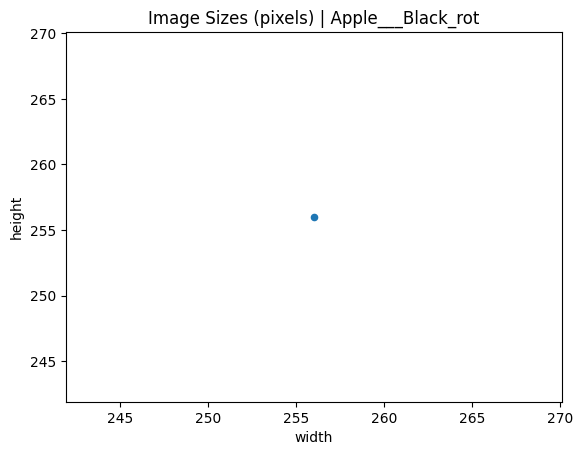

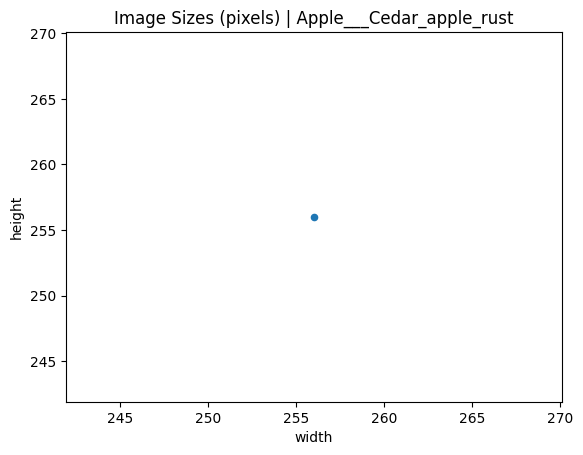

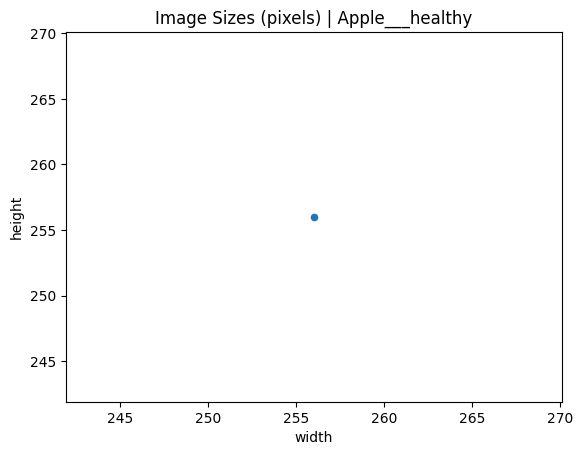

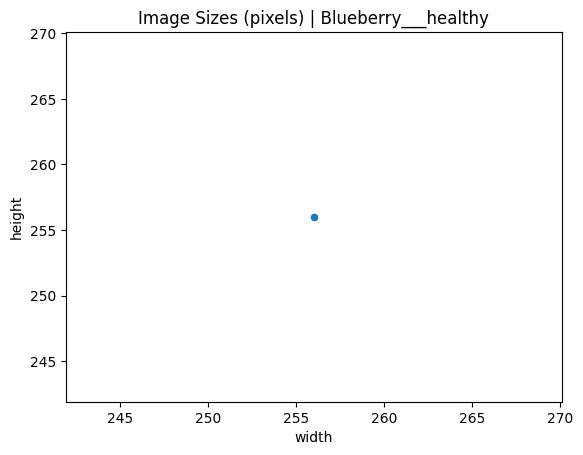

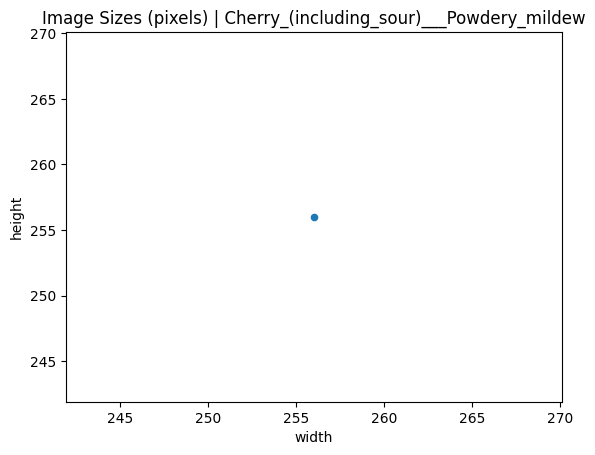

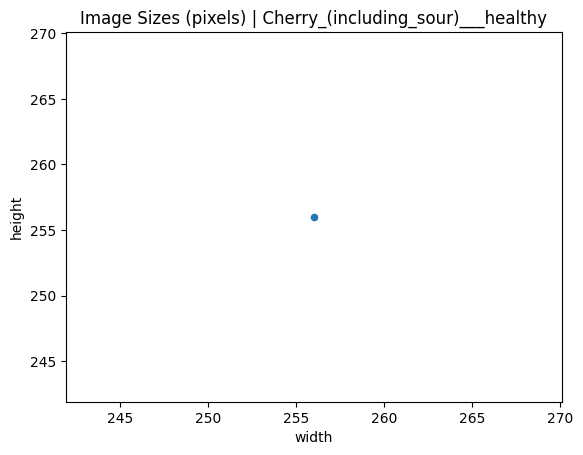

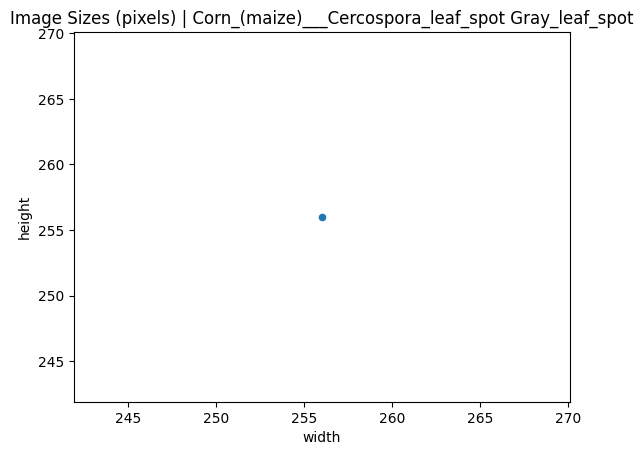

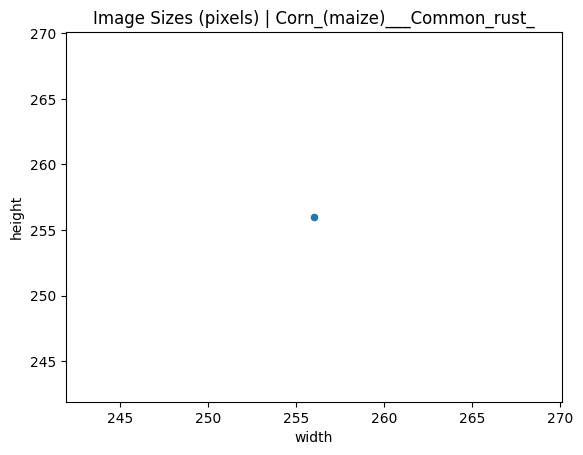

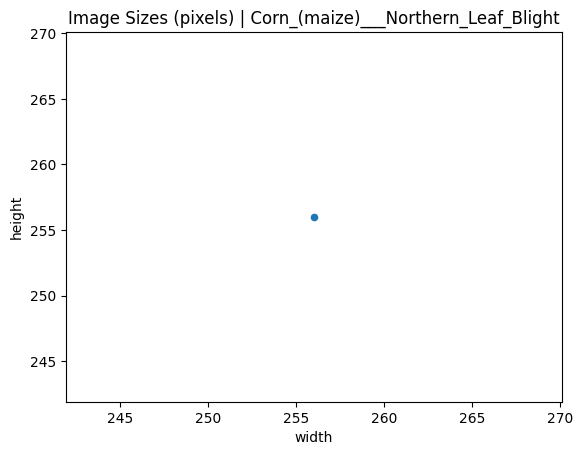

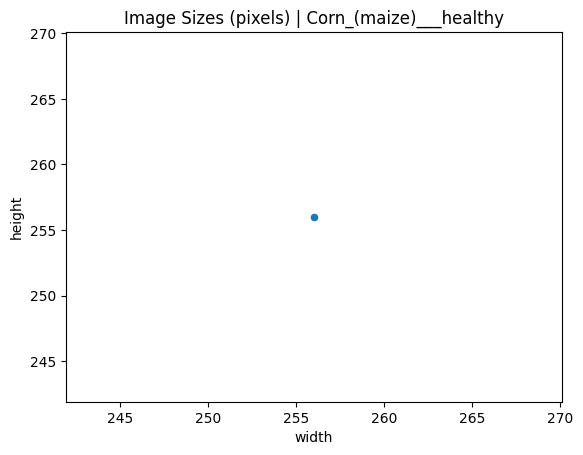

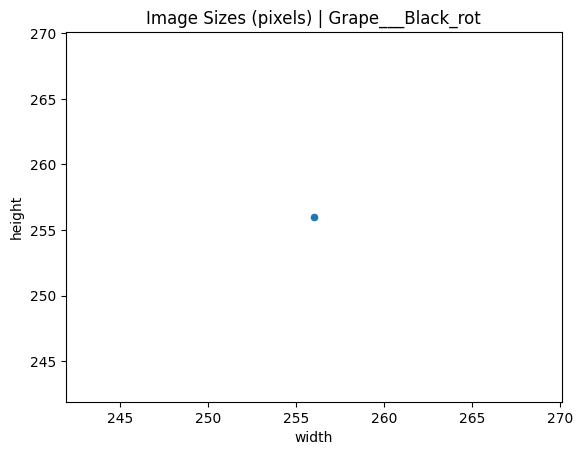

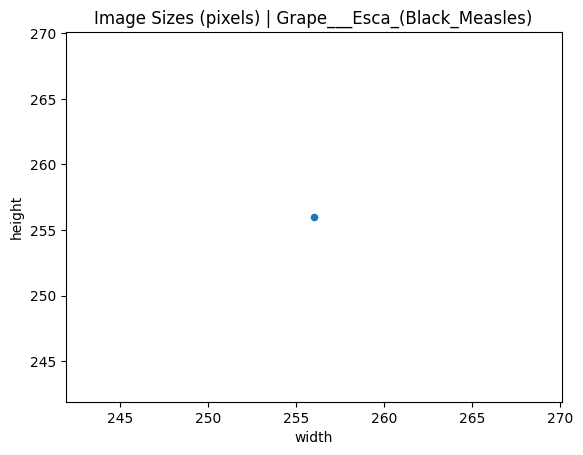

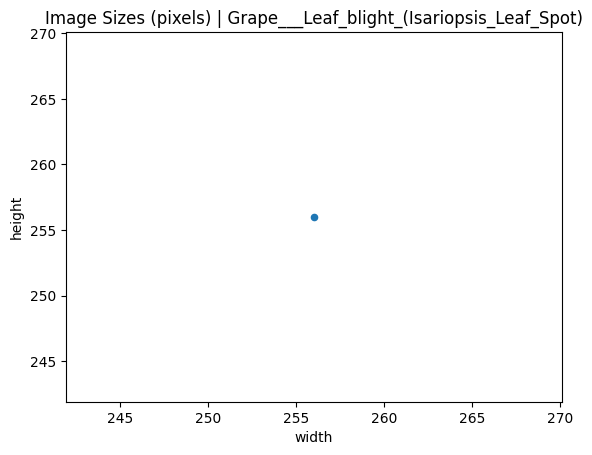

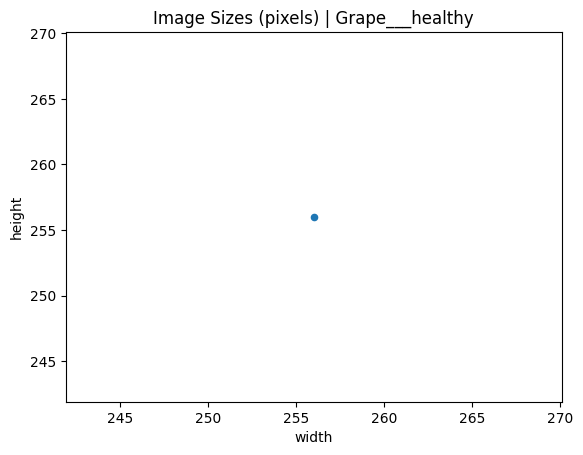

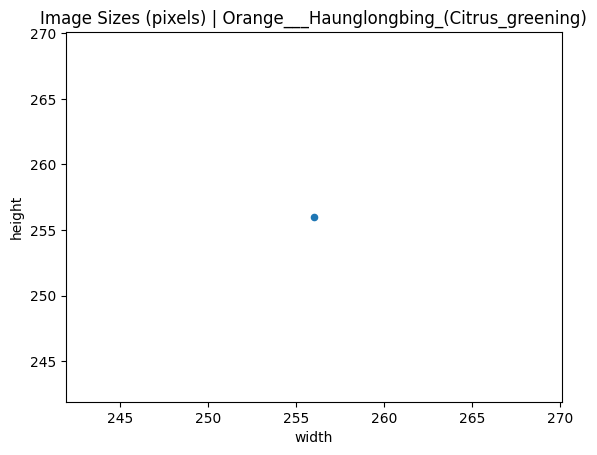

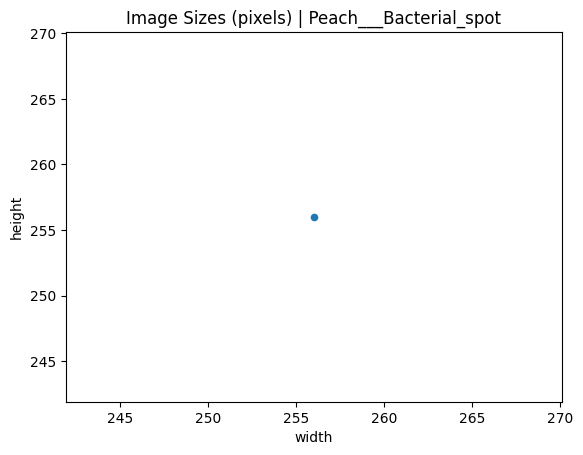

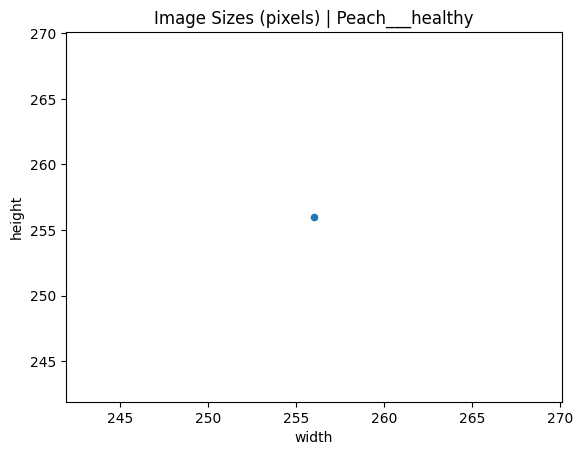

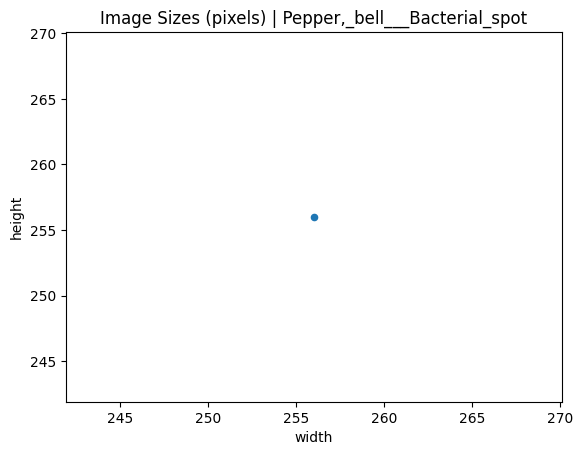

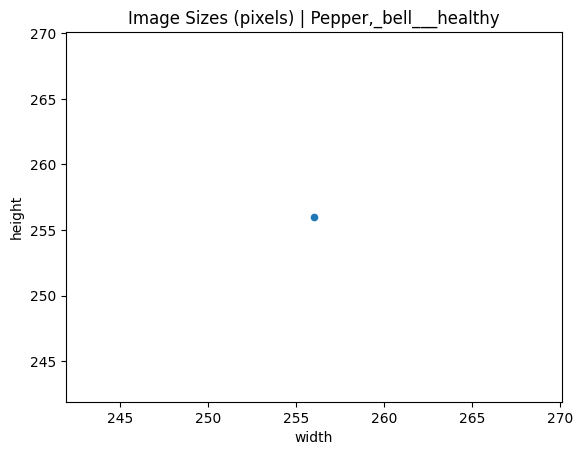

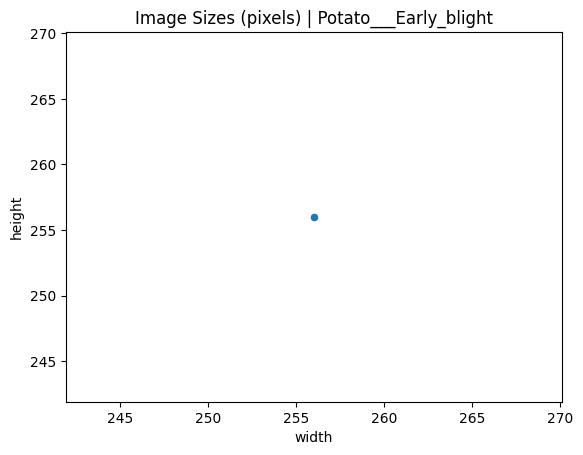

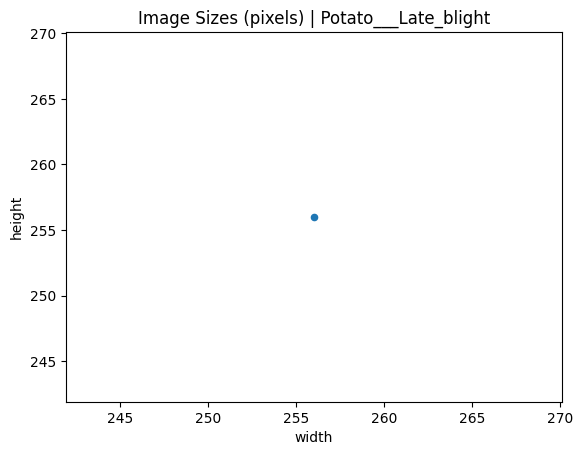

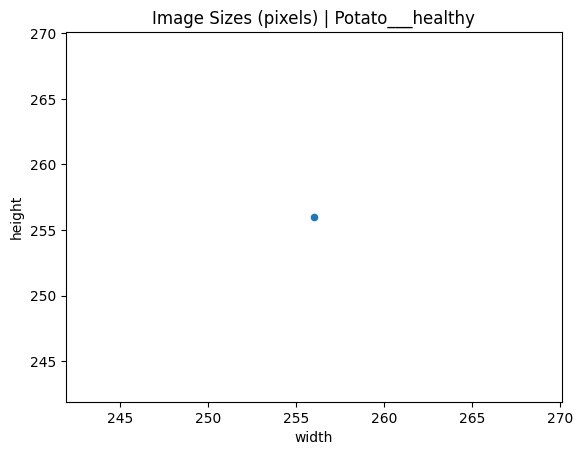

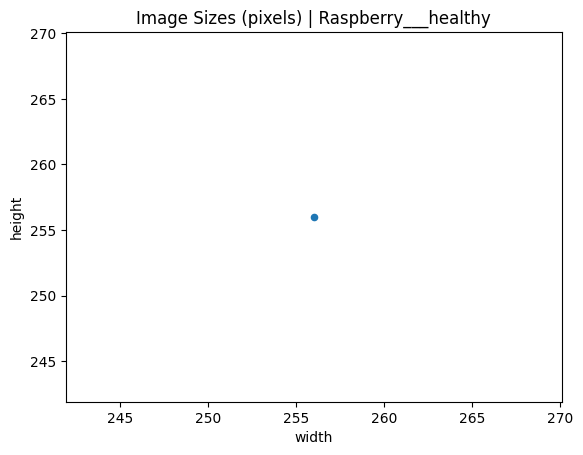

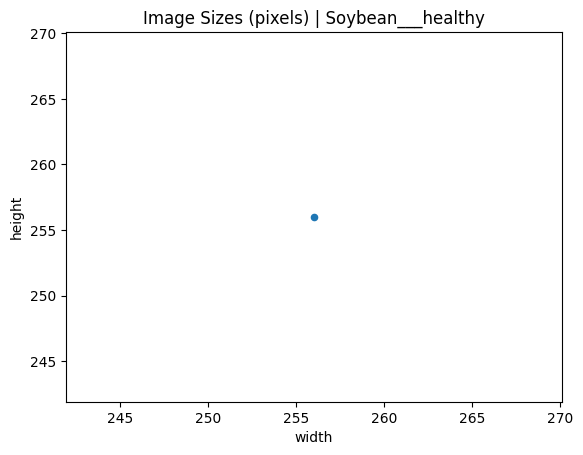

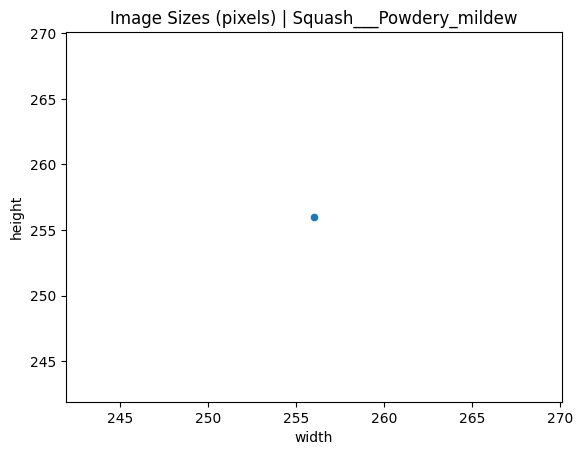

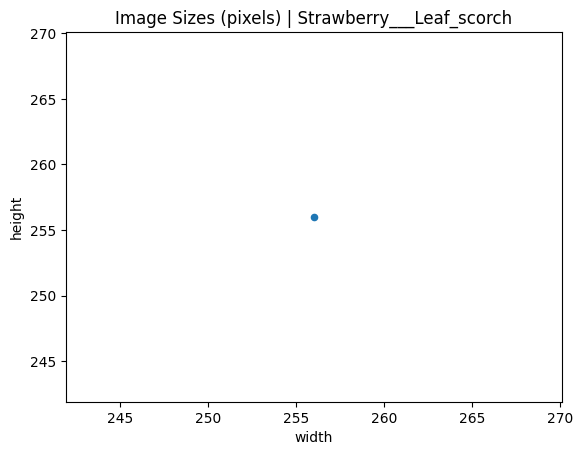

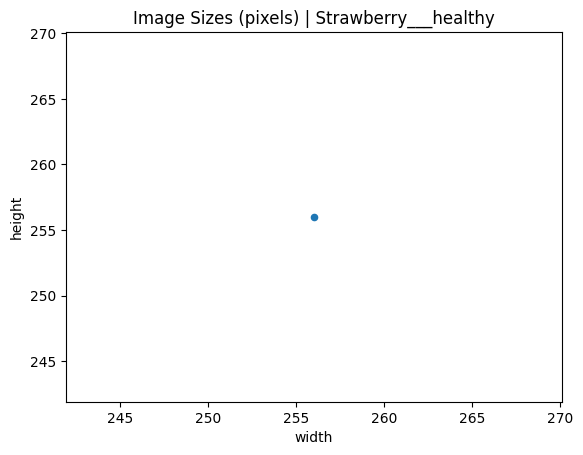

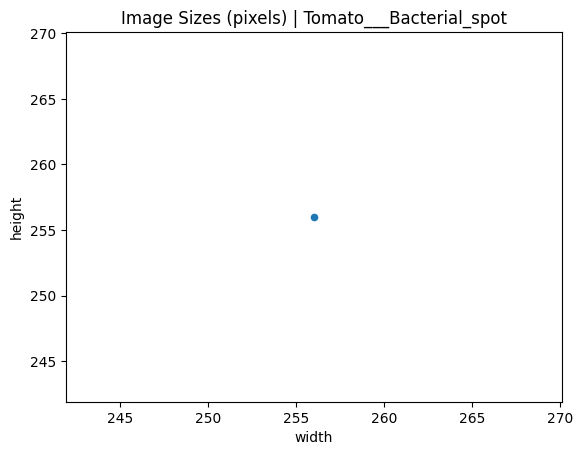

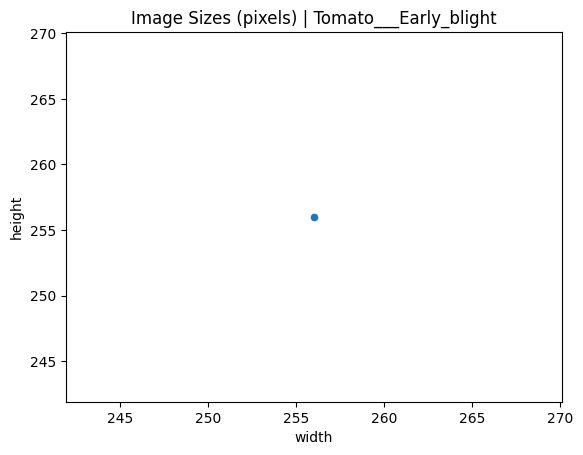

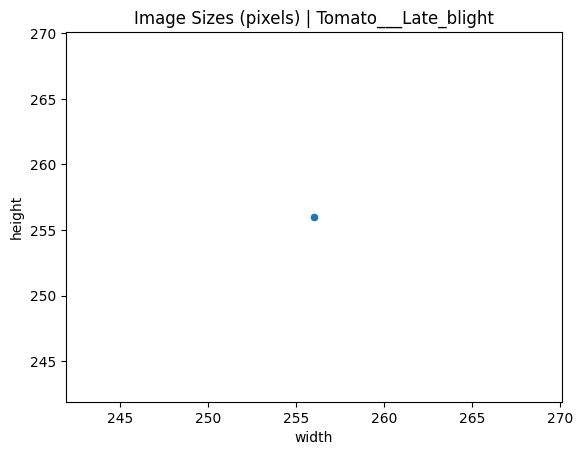

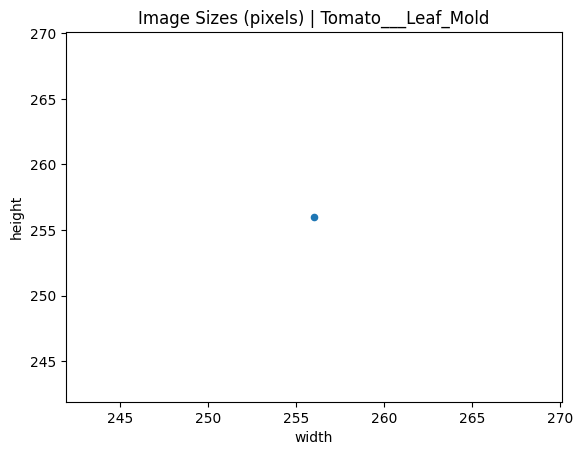

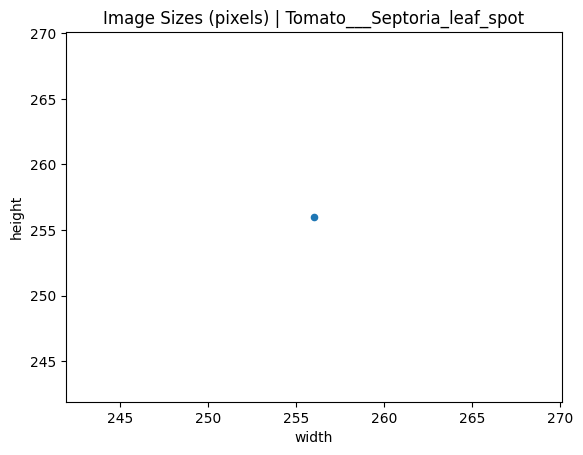

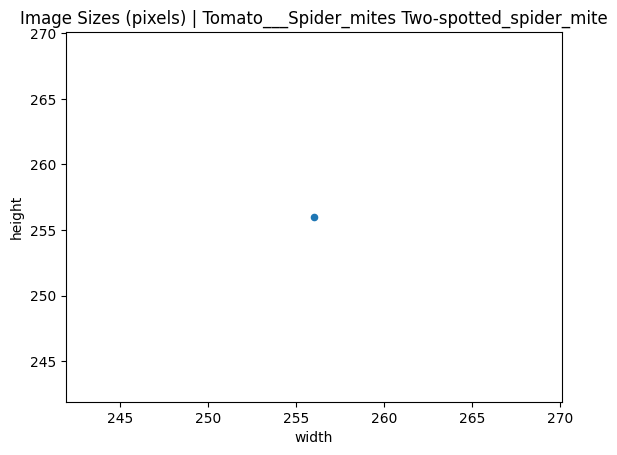

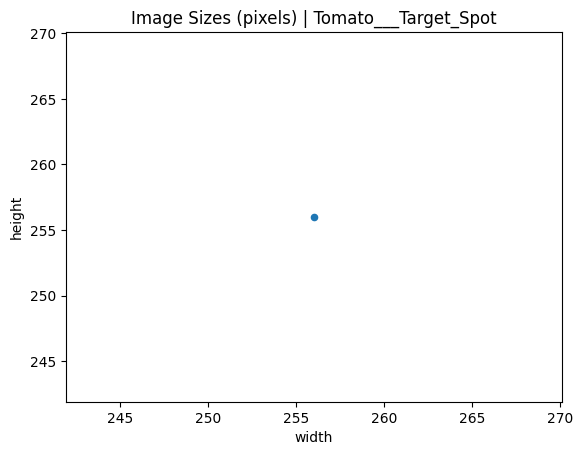

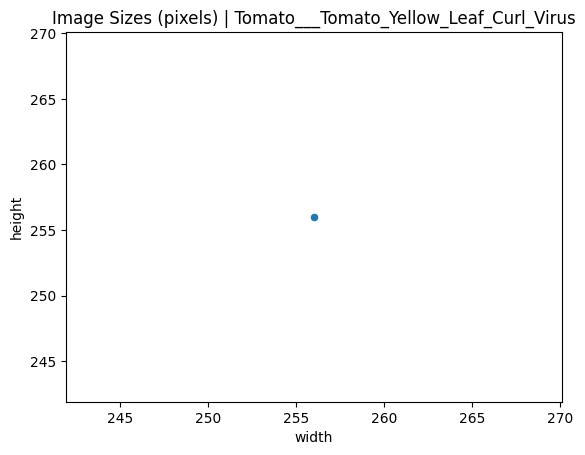

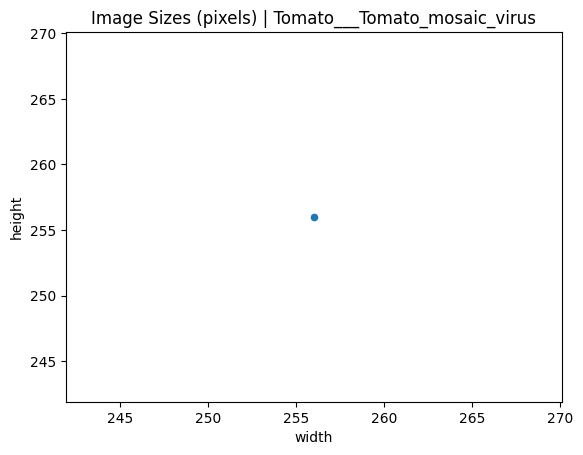

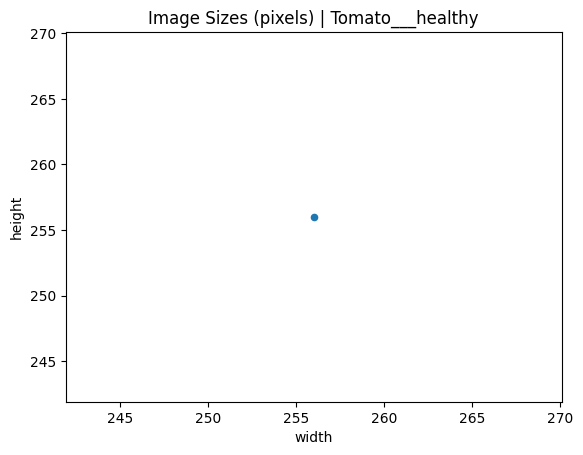

In [8]:
import os
import dask.bag as db
import dask.array as da
from dask.diagnostics import ProgressBar
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



for n,d in class_path_dict.items():
  filepath = d
  filelist = [os.path.join(filepath, f) for f in os.listdir(filepath)]
  dims = db.from_sequence(filelist).map(get_dims)
    
  with ProgressBar():
    dims = dims.compute()
    dim_df = pd.DataFrame(dims, columns=['height', 'width'])
    sizes = dim_df.groupby(['height', 'width']).size().reset_index().rename(columns={0:'count'})
    sizes.plot.scatter(x='width', y='height');
    plt.title('Image Sizes (pixels) | {}'.format(n))

  